## MSCI ACWI Replica with portfolio rebalancing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from dotenv import load_dotenv
load_dotenv()

import os
os.chdir(os.path.expanduser('../data'))
from DataProvider import DataProvider

os.chdir(os.path.expanduser('../backtesting'))

In [4]:
try:
    df_prices = pd.read_csv('cached_df_countries.csv', index_col=0, parse_dates=True)
    df_benchmark = pd.read_csv('cached_benchmark.csv', index_col=0, parse_dates=True)
    benchmark = df_benchmark.iloc[:, 0]
except:
    data_provider = DataProvider()
    df_prices, benchmark = data_provider.get_etf_data()
    df_prices.to_csv('cached_df_countries.csv')
    benchmark.to_csv('cached_benchmark.csv')

In [6]:
df_prices

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,Norway,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia
1999-01-04,78.5730,28.4505,16.0658,5.8518,11.3908,11.4812,12.7437,3.4484,14.4953,7.7297,...,6.8550,17.9195,12.9262,4.4013,9.9079,5.1713,1.7335,7.6804,6.2795,4.7722
1999-01-05,79.4712,28.2760,16.2128,5.9427,11.4526,11.6441,12.6095,3.4484,14.6994,7.8733,...,6.9694,17.7270,12.3668,4.4565,10.3690,5.2940,1.6368,7.8505,6.3180,4.9457
1999-01-06,81.3871,28.6251,16.8985,6.2763,11.6995,11.8884,13.6156,3.5603,14.9716,7.9690,...,7.1506,18.2264,12.5819,4.5453,10.6559,5.4538,1.6413,8.4114,6.2024,5.2928
1999-01-07,80.9879,28.7996,16.6046,6.1853,11.6069,11.8069,12.6766,3.6275,14.5293,8.0408,...,7.0376,18.6356,13.0811,4.6695,11.2644,5.1677,1.6489,8.3635,6.1254,5.2060
1999-01-08,81.5867,28.7996,16.5066,6.2763,11.4217,11.8069,12.7102,3.6275,14.3592,7.9451,...,7.2123,18.4129,13.1429,4.8183,10.7151,5.0392,1.6337,8.4212,5.9327,5.7266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,473.6500,63.3300,32.9200,36.4300,39.1300,47.4500,29.5200,24.2400,44.2500,39.4300,...,23.9900,39.2900,44.4700,48.3600,63.9700,34.6200,8.0600,40.7500,67.8100,21.1600
2023-12-26,475.6500,63.3100,33.0900,36.8300,39.3700,47.7000,29.6900,24.4400,44.6600,39.6000,...,24.2200,39.5700,45.4100,48.5300,64.2700,35.1500,8.0600,40.9700,68.3100,21.1100
2023-12-27,476.5100,63.6600,33.2200,36.8700,39.5100,48.0700,29.8600,24.5600,44.8700,39.9300,...,24.5200,39.5300,45.8600,48.8400,64.8500,35.2700,8.0600,41.9700,68.4600,21.1600
2023-12-28,476.6900,64.0400,33.0500,36.7000,39.1300,47.8600,29.6600,24.4900,44.6400,39.7500,...,24.2000,40.4600,46.0300,49.0200,65.9800,35.1100,8.0600,40.9400,67.9600,21.2100


In [7]:
benchmark

1999-01-04     27.9929
1999-01-05     28.2768
1999-01-06     28.8141
1999-01-07     28.7371
1999-01-08     28.7077
                ...   
2023-12-22    101.1800
2023-12-26    101.6700
2023-12-27    101.9600
2023-12-28    101.9600
2023-12-29    101.7700
Name: ACWI, Length: 6289, dtype: float64

### Get Estimated Weights based on ACWI index

In [8]:
try:
    df_weights = pd.read_csv('cached_acwi_weights.csv', index_col=0, parse_dates=True)
except:
    data_provider = DataProvider()
    df_weights = data_provider.get_acwi_weights()
    df_weights.to_csv('cached_acwi_weights.csv')

df_weights = df_weights.loc[:'2023']
df_weights

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,Norway,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia
1999-01-01,48.22,10.74,10.66,2.28,3.91,3.35,3.89,1.36,1.53,1.20,...,0.40,0.08,1.02,0.36,0.33,0.87,0.34,0.65,0.71,0.33
2000-01-01,49.71,10.17,10.88,2.26,3.71,3.29,3.57,1.49,1.55,1.20,...,0.40,0.12,0.89,0.32,0.47,0.72,0.30,0.63,0.61,0.31
2001-01-01,51.16,9.59,11.09,2.24,3.51,3.23,3.25,1.62,1.56,1.20,...,0.40,0.17,0.76,0.28,0.60,0.57,0.26,0.61,0.51,0.28
2002-01-01,52.62,9.02,11.31,2.22,3.31,3.17,2.93,1.75,1.58,1.20,...,0.40,0.21,0.64,0.24,0.73,0.42,0.23,0.58,0.41,0.25
2003-01-01,54.06,8.45,11.51,2.20,3.10,3.10,2.60,1.88,1.60,1.20,...,0.40,0.26,0.51,0.20,0.86,0.27,0.19,0.56,0.31,0.22
2004-01-01,51.65,8.49,11.14,2.50,3.33,3.31,2.83,2.07,1.54,1.22,...,0.44,0.57,0.63,0.35,1.01,0.52,0.38,0.60,0.35,0.23
2005-01-01,49.23,8.52,10.77,2.79,3.55,3.51,3.05,2.25,1.48,1.24,...,0.48,0.88,0.76,0.50,1.17,0.77,0.58,0.64,0.39,0.24
2006-01-01,46.80,8.56,10.39,3.09,3.77,3.71,3.27,2.43,1.42,1.26,...,0.52,1.19,0.88,0.65,1.32,1.02,0.77,0.68,0.43,0.26
2007-01-01,44.37,8.59,10.01,3.39,3.99,3.91,3.49,2.62,1.36,1.28,...,0.56,1.50,1.00,0.79,1.47,1.27,0.96,0.72,0.47,0.27
2008-01-01,41.94,8.63,9.63,3.68,4.21,4.11,3.71,2.80,1.30,1.30,...,0.60,1.81,1.12,0.94,1.63,1.51,1.15,0.76,0.51,0.28


In [9]:
df_weights.sum(axis=1)

1999-01-01    98.00
2000-01-01    98.31
2001-01-01    98.54
2002-01-01    98.80
2003-01-01    99.00
2004-01-01    98.82
2005-01-01    98.61
2006-01-01    98.37
2007-01-01    98.12
2008-01-01    97.86
2009-01-01    97.89
2010-01-01    97.86
2011-01-01    97.76
2012-01-01    97.71
2013-01-01    97.63
2014-01-01    97.66
2015-01-01    97.80
2016-01-01    97.88
2017-01-01    97.97
2018-01-01    98.10
2019-01-01    97.85
2020-01-01    97.89
2021-01-01    97.93
2022-01-01    97.77
2023-01-01    97.57
Freq: AS-JAN, dtype: float64

In [10]:
normalized_weights = df_weights.div(df_weights.sum(axis=1), axis=0)
normalized_weights

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,Norway,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia
1999-01-01,0.492041,0.109592,0.108776,0.023265,0.039898,0.034184,0.039694,0.013878,0.015612,0.012245,...,0.004082,0.000816,0.010408,0.003673,0.003367,0.008878,0.003469,0.006633,0.007245,0.003367
2000-01-01,0.505645,0.103448,0.110670,0.022989,0.037738,0.033466,0.036314,0.015156,0.015766,0.012206,...,0.004069,0.001221,0.009053,0.003255,0.004781,0.007324,0.003052,0.006408,0.006205,0.003153
2001-01-01,0.519180,0.097321,0.112543,0.022732,0.035620,0.032779,0.032982,0.016440,0.015831,0.012178,...,0.004059,0.001725,0.007713,0.002841,0.006089,0.005784,0.002639,0.006190,0.005176,0.002841
2002-01-01,0.532591,0.091296,0.114474,0.022470,0.033502,0.032085,0.029656,0.017713,0.015992,0.012146,...,0.004049,0.002126,0.006478,0.002429,0.007389,0.004251,0.002328,0.005870,0.004150,0.002530
2003-01-01,0.546061,0.085354,0.116263,0.022222,0.031313,0.031313,0.026263,0.018990,0.016162,0.012121,...,0.004040,0.002626,0.005152,0.002020,0.008687,0.002727,0.001919,0.005657,0.003131,0.002222
2004-01-01,0.522667,0.085914,0.112730,0.025299,0.033698,0.033495,0.028638,0.020947,0.015584,0.012346,...,0.004453,0.005768,0.006375,0.003542,0.010221,0.005262,0.003845,0.006072,0.003542,0.002327
2005-01-01,0.499239,0.086401,0.109218,0.028293,0.036000,0.035595,0.030930,0.022817,0.015009,0.012575,...,0.004868,0.008924,0.007707,0.005070,0.011865,0.007809,0.005882,0.006490,0.003955,0.002434
2006-01-01,0.475755,0.087018,0.105622,0.031412,0.038325,0.037715,0.033242,0.024703,0.014435,0.012809,...,0.005286,0.012097,0.008946,0.006608,0.013419,0.010369,0.007828,0.006913,0.004371,0.002643
2007-01-01,0.452201,0.087546,0.102018,0.034550,0.040664,0.039849,0.035569,0.026702,0.013861,0.013045,...,0.005707,0.015287,0.010192,0.008051,0.014982,0.012943,0.009784,0.007338,0.004790,0.002752
2008-01-01,0.428571,0.088187,0.098406,0.037605,0.043021,0.041999,0.037911,0.028612,0.013284,0.013284,...,0.006131,0.018496,0.011445,0.009606,0.016656,0.015430,0.011751,0.007766,0.005212,0.002861


In [34]:
normalized_weights.sum(axis=1)

1999-01-01    1.0
2000-01-01    1.0
2001-01-01    1.0
2002-01-01    1.0
2003-01-01    1.0
2004-01-01    1.0
2005-01-01    1.0
2006-01-01    1.0
2007-01-01    1.0
2008-01-01    1.0
2009-01-01    1.0
2010-01-01    1.0
2011-01-01    1.0
2012-01-01    1.0
2013-01-01    1.0
2014-01-01    1.0
2015-01-01    1.0
2016-01-01    1.0
2017-01-01    1.0
2018-01-01    1.0
2019-01-01    1.0
2020-01-01    1.0
2021-01-01    1.0
2022-01-01    1.0
2023-01-01    1.0
dtype: float64

### Simple Yearly Rebalancing to new ACWI weights

In [35]:
def calculate_num_participations_with_partial_rebalancing(
        df_price, normalized_weights, days_to_rebalance, inicial_capital=10000):
    df_num_participations = pd.DataFrame(np.zeros(df_price.shape),
                                         columns=df_price.columns,
                                         index=df_price.index)
    model_portfolio_row = 0
    model_portfolio = normalized_weights.iloc[model_portfolio_row]
    num_participations = model_portfolio*inicial_capital/df_price.iloc[0]

    for day in range(df_price.shape[0]):
        current_valuation = (df_price.iloc[day] * num_participations)
        current_percentages = current_valuation / current_valuation.sum()

        if df_prices.index[day] in days_to_rebalance:
            model_portfolio_row += 1
            model_portfolio = normalized_weights.iloc[model_portfolio_row]

            surpluses = (current_percentages/model_portfolio)-1
            surpluses[surpluses < 0] = 0
            surpluses[surpluses > 1] = 1
            participations_to_sell = surpluses * num_participations
            participations_to_sell = participations_to_sell.fillna(0)

            sold_value = (participations_to_sell * df_price.iloc[day]).sum()

            shortages = (current_percentages/model_portfolio)-1
            shortages[shortages > 0] = 0
            shortages *= model_portfolio
            shortages = shortages.fillna(0)
            percentages_to_redistribute = shortages/shortages.sum()
            participations_to_buy = (
                sold_value * percentages_to_redistribute) / df_price.iloc[day]
            participations_to_buy = participations_to_buy.fillna(0)

            num_participations -= participations_to_sell
            num_participations += participations_to_buy

        df_num_participations.iloc[day, :] = num_participations

    return df_num_participations

In [36]:
def calculate_num_participations_with_total_rebalancing(
        df_price, normalized_weights, days_to_rebalance, inicial_capital=10000):
    df_num_participations = pd.DataFrame(np.zeros(df_price.shape),
                                         columns=df_price.columns,
                                         index=df_price.index)
    model_portfolio_row = 0
    model_portfolio = normalized_weights.iloc[model_portfolio_row]
    num_participations = model_portfolio*inicial_capital/df_price.iloc[0]

    for day in range(df_price.shape[0]):
        if df_prices.index[day] in days_to_rebalance:
            model_portfolio_row += 1
            new_weights = normalized_weights.iloc[model_portfolio_row]

            current_value = (num_participations * df_price.iloc[day]).sum()
            num_participations = (current_value * new_weights) / df_price.iloc[day]

        df_num_participations.iloc[day, :] = num_participations

    return df_num_participations

In [37]:
days_to_rebalance = []
for year_start in normalized_weights.index:
    mask = df_prices.index.values >= year_start
    days_to_rebalance.append(df_prices.index.values[mask][0])
days_to_rebalance = days_to_rebalance[1:]

str_list = [dt.astype(str)[:10] for dt in days_to_rebalance] 
str_list

['2000-01-03',
 '2001-01-02',
 '2002-01-02',
 '2003-01-02',
 '2004-01-02',
 '2005-01-03',
 '2006-01-03',
 '2007-01-03',
 '2008-01-02',
 '2009-01-02',
 '2010-01-04',
 '2011-01-03',
 '2012-01-03',
 '2013-01-02',
 '2014-01-02',
 '2015-01-02',
 '2016-01-04',
 '2017-01-03',
 '2018-01-02',
 '2019-01-02',
 '2020-01-02',
 '2021-01-04',
 '2022-01-03',
 '2023-01-03']

In [38]:
df_num_participations = calculate_num_participations_with_partial_rebalancing(
    df_prices, normalized_weights, days_to_rebalance)
df_num_participations

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,Norway,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia
1999-01-04,62.622124,38.520180,67.706252,39.757521,35.026477,29.773607,31.147844,40.243449,10.770557,15.841362,...,5.954242,0.455552,8.051990,8.346328,3.398648,17.166962,20.013774,8.635817,11.537380,7.056173
1999-01-05,62.622124,38.520180,67.706252,39.757521,35.026477,29.773607,31.147844,40.243449,10.770557,15.841362,...,5.954242,0.455552,8.051990,8.346328,3.398648,17.166962,20.013774,8.635817,11.537380,7.056173
1999-01-06,62.622124,38.520180,67.706252,39.757521,35.026477,29.773607,31.147844,40.243449,10.770557,15.841362,...,5.954242,0.455552,8.051990,8.346328,3.398648,17.166962,20.013774,8.635817,11.537380,7.056173
1999-01-07,62.622124,38.520180,67.706252,39.757521,35.026477,29.773607,31.147844,40.243449,10.770557,15.841362,...,5.954242,0.455552,8.051990,8.346328,3.398648,17.166962,20.013774,8.635817,11.537380,7.056173
1999-01-08,62.622124,38.520180,67.706252,39.757521,35.026477,29.773607,31.147844,40.243449,10.770557,15.841362,...,5.954242,0.455552,8.051990,8.346328,3.398648,17.166962,20.013774,8.635817,11.537380,7.056173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,68.494182,48.433991,54.323372,40.084562,39.491869,24.809752,36.954666,39.483504,12.752515,13.256815,...,4.582423,29.098212,19.621101,16.468700,10.905468,7.623956,0.000000,3.697133,2.561505,3.419041
2023-12-26,68.494182,48.433991,54.323372,40.084562,39.491869,24.809752,36.954666,39.483504,12.752515,13.256815,...,4.582423,29.098212,19.621101,16.468700,10.905468,7.623956,0.000000,3.697133,2.561505,3.419041
2023-12-27,68.494182,48.433991,54.323372,40.084562,39.491869,24.809752,36.954666,39.483504,12.752515,13.256815,...,4.582423,29.098212,19.621101,16.468700,10.905468,7.623956,0.000000,3.697133,2.561505,3.419041
2023-12-28,68.494182,48.433991,54.323372,40.084562,39.491869,24.809752,36.954666,39.483504,12.752515,13.256815,...,4.582423,29.098212,19.621101,16.468700,10.905468,7.623956,0.000000,3.697133,2.561505,3.419041


In [39]:
operations = df_num_participations.diff()
operations = operations[operations != 0].dropna(thresh=1)
operations

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,Norway,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia
2000-01-03,7.851679,-13.365450,12.633803,-6.003259,-1.586165,12.676614,1.046808,10.439685,3.457226,-4.317823,...,0.113189,0.442674,-3.014984,-6.119714,-0.000789,-9.480005,-20.013774,-3.263485,-7.690037,-5.995840
2001-01-02,-1.548560,8.496763,-0.111632,-5.834504,-6.717730,-14.598572,-1.713758,-0.708960,-1.246326,3.737366,...,-0.686462,0.640476,3.128917,3.498914,4.462169,0.936506,8.638510,1.471107,3.740894,4.232335
2002-01-02,-1.641609,4.589777,3.766312,2.456658,3.926587,10.406219,-0.071803,-3.342615,2.764553,0.843860,...,0.196583,0.678234,-4.362102,-1.047264,-4.546893,-2.708327,-8.638510,0.038823,-6.658063,-3.001363
2003-01-02,5.444729,-8.063082,-2.193802,-3.774647,-2.858195,-6.649527,2.144796,-5.642838,-0.535741,2.630735,...,-0.553690,0.317313,1.077629,-2.186661,1.770256,-0.361800,2.275870,-3.661176,2.260076,0.156534
2004-01-02,0.126838,0.372068,-3.556837,-0.071041,1.292262,3.300742,-3.945202,-1.690650,0.404328,-4.123760,...,0.062914,1.406064,0.606882,1.761124,0.308283,0.995029,0.614845,1.354294,-0.067989,0.126340
2005-01-03,-0.799975,0.890640,-4.865166,2.054629,0.819105,1.106444,2.813124,-0.724262,-0.584793,-1.673011,...,-0.899582,3.416264,1.989454,1.705229,1.000008,2.197844,1.609959,-0.903595,-0.516132,0.150188
2006-01-03,1.034868,-4.242639,0.519501,-1.451757,2.092133,1.111975,2.485105,0.969712,-0.931493,0.496289,...,0.133465,2.257268,1.496729,0.462000,-1.747262,-0.922575,-0.903410,-0.173832,-0.431800,0.685629
2007-01-03,0.158545,6.121001,-7.247838,5.722008,-0.725719,0.170052,-1.281247,0.274319,-1.505485,-1.979484,...,-0.255218,-2.309732,1.502882,-0.152932,1.937071,0.943080,-0.612205,0.616773,-0.080214,-0.490953
2008-01-02,0.239165,6.219685,2.017465,-4.074423,1.804477,4.689693,-3.964811,-3.210640,-1.122474,2.507391,...,-0.359485,-0.712410,2.581929,-1.880358,-0.574494,-3.085637,0.488974,-0.171135,0.292669,-0.537705
2009-01-02,-2.971421,-10.341425,7.327379,4.890953,-1.163826,-11.277850,1.636465,9.591435,0.673655,0.859110,...,2.275166,2.156251,1.061080,4.289735,2.551080,3.341867,4.198567,0.183280,0.036681,0.441866


In [40]:
df_num_participations2 = calculate_num_participations_with_total_rebalancing(
    df_prices, normalized_weights, days_to_rebalance)
df_num_participations2

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,Norway,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia
1999-01-04,62.622124,38.520180,67.706252,39.757521,35.026477,29.773607,31.147844,40.243449,10.770557,15.841362,...,5.954242,0.455552,8.051990,8.346328,3.398648,17.166962,20.013774,8.635817,11.537380,7.056173
1999-01-05,62.622124,38.520180,67.706252,39.757521,35.026477,29.773607,31.147844,40.243449,10.770557,15.841362,...,5.954242,0.455552,8.051990,8.346328,3.398648,17.166962,20.013774,8.635817,11.537380,7.056173
1999-01-06,62.622124,38.520180,67.706252,39.757521,35.026477,29.773607,31.147844,40.243449,10.770557,15.841362,...,5.954242,0.455552,8.051990,8.346328,3.398648,17.166962,20.013774,8.635817,11.537380,7.056173
1999-01-07,62.622124,38.520180,67.706252,39.757521,35.026477,29.773607,31.147844,40.243449,10.770557,15.841362,...,5.954242,0.455552,8.051990,8.346328,3.398648,17.166962,20.013774,8.635817,11.537380,7.056173
1999-01-08,62.622124,38.520180,67.706252,39.757521,35.026477,29.773607,31.147844,40.243449,10.770557,15.841362,...,5.954242,0.455552,8.051990,8.346328,3.398648,17.166962,20.013774,8.635817,11.537380,7.056173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,67.337178,47.842836,55.104034,39.615157,39.011228,24.507050,36.490721,39.448979,12.460950,13.008753,...,4.526910,28.853438,18.971636,16.274667,10.744015,9.260081,0.000000,3.859590,2.553824,3.452406
2023-12-26,67.337178,47.842836,55.104034,39.615157,39.011228,24.507050,36.490721,39.448979,12.460950,13.008753,...,4.526910,28.853438,18.971636,16.274667,10.744015,9.260081,0.000000,3.859590,2.553824,3.452406
2023-12-27,67.337178,47.842836,55.104034,39.615157,39.011228,24.507050,36.490721,39.448979,12.460950,13.008753,...,4.526910,28.853438,18.971636,16.274667,10.744015,9.260081,0.000000,3.859590,2.553824,3.452406
2023-12-28,67.337178,47.842836,55.104034,39.615157,39.011228,24.507050,36.490721,39.448979,12.460950,13.008753,...,4.526910,28.853438,18.971636,16.274667,10.744015,9.260081,0.000000,3.859590,2.553824,3.452406


In [41]:
operations = df_num_participations2.diff()
operations = operations[operations != 0].dropna(thresh=1)
operations

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,Norway,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia
2000-01-03,5.414754,-9.922584,8.712650,-5.215705,-1.517448,8.742174,0.721911,7.199520,2.384206,-3.393004,...,0.078059,0.305282,-2.193610,-3.530831,-0.000789,-6.107370,-11.489181,-2.368447,-4.614394,-3.241468
2001-01-02,0.527359,3.398694,3.350931,-5.926744,-5.821914,-7.109027,-1.477030,2.255178,-0.147726,2.081868,...,-0.612727,0.658807,1.722182,0.274926,3.649028,-2.646664,-1.422665,0.283675,-0.022163,0.719070
2002-01-02,-1.707670,4.787789,2.665534,0.912915,1.729698,3.882083,-0.193621,-3.180744,1.911630,1.243916,...,0.068340,0.605698,-2.294696,-0.283674,-2.101817,-1.895847,-3.573418,0.273564,-2.886911,-1.179707
2003-01-02,4.555783,-5.379352,-1.038660,-2.660871,-1.539600,-2.879072,1.814432,-5.153353,0.223643,2.417699,...,-0.442566,0.441794,-0.611417,-1.636556,-0.185226,-0.974220,-1.644658,-2.357440,-1.218188,-0.946070
2004-01-02,1.075257,-1.039256,-3.386816,-0.465623,0.939969,2.011842,-3.120052,-2.191041,0.357261,-2.911093,...,0.010569,1.318846,0.728791,0.892554,0.575904,0.877944,0.933679,-0.044247,0.312717,0.141483
2005-01-03,-0.764062,0.852623,-4.694083,1.877444,0.875591,1.331508,2.145232,-0.768347,-0.519745,-2.232067,...,-0.753955,3.250853,1.873257,1.724809,0.942320,2.100741,1.527576,-0.620161,-0.441750,0.149489
2006-01-03,0.865276,-3.654384,0.144322,-1.211648,1.869095,1.043504,2.374891,0.814357,-0.898156,0.254389,...,-0.020335,2.235212,1.458335,0.540104,-1.283729,-0.649573,-0.615623,-0.314538,-0.442204,0.604748
2007-01-03,0.238144,4.883554,-6.533211,4.963747,-0.449502,0.276177,-0.921421,0.348443,-1.413822,-1.657898,...,-0.224442,-1.563246,1.515803,-0.091652,1.333047,0.740360,-0.672338,0.534463,-0.139080,-0.339321
2008-01-02,0.243930,5.931459,1.075920,-2.951542,1.512509,3.976655,-3.552205,-2.911309,-1.165445,1.860249,...,-0.341344,-1.088212,2.344409,-1.440308,-0.305581,-2.161486,0.323782,-0.092697,0.244060,-0.512169
2009-01-02,-2.902818,-7.242970,6.381257,3.629069,-0.885692,-8.169513,0.909977,7.783094,0.459598,1.088870,...,1.880627,1.742596,1.271566,3.172521,2.092809,2.005536,3.603925,0.141962,0.072516,0.285361


Checking if rebalanced correctly

In [42]:
# Percentages on different days
total_values = df_num_participations2.mul(df_prices)
diff = total_values.div(total_values.sum(axis=1), axis=0)
diff.loc['2014-12-29':'2015-01-05']

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,Norway,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia
2014-12-29,0.545216,0.068312,0.067395,0.040318,0.027359,0.028800,0.025153,0.029332,0.007799,0.010934,...,0.002555,0.025494,0.014678,0.010545,0.016783,0.012698,0.003864,0.009651,0.005038,0.003757
2014-12-30,0.545366,0.067859,0.067332,0.040547,0.027110,0.028801,0.024979,0.029329,0.007765,0.011013,...,0.002556,0.025336,0.014781,0.010669,0.016742,0.012851,0.004173,0.009725,0.005065,0.003787
2014-12-31,0.544080,0.068014,0.067472,0.040856,0.027120,0.028776,0.024943,0.029249,0.007795,0.010935,...,0.002548,0.025927,0.014884,0.010776,0.016891,0.012882,0.003953,0.009742,0.005113,0.003785
2015-01-02,0.515542,0.073620,0.071063,0.040491,0.030777,0.029550,0.028221,0.030368,0.008998,0.012270,...,0.003272,0.026892,0.014928,0.009714,0.019325,0.014315,0.006851,0.008896,0.005419,0.003988
2015-01-05,0.516403,0.074232,0.070665,0.040196,0.030269,0.029742,0.027785,0.030684,0.008866,0.012174,...,0.003229,0.027394,0.015035,0.009749,0.019468,0.014103,0.006708,0.008814,0.005365,0.003972


In [43]:
# New weights
normalized_weights.loc['2015']

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,Norway,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia
2015-01-01,0.515542,0.07362,0.071063,0.040491,0.030777,0.02955,0.028221,0.030368,0.008998,0.01227,...,0.003272,0.026892,0.014928,0.009714,0.019325,0.014315,0.006851,0.008896,0.005419,0.003988


Comparing to Benchmark

In [44]:
total_value_portfolio = df_num_participations2.mul(df_prices).sum(axis=1)

In [45]:
num_participations = 10000/benchmark.iloc[0]
benchmark_value = benchmark * num_participations
benchmark_value

1999-01-04    10000.000000
1999-01-05    10101.418574
1999-01-06    10293.360102
1999-01-07    10265.853127
1999-01-08    10255.350464
                  ...     
2023-12-22    36144.879594
2023-12-26    36319.923981
2023-12-27    36423.521679
2023-12-28    36423.521679
2023-12-29    36355.647325
Name: ACWI, Length: 6289, dtype: float64

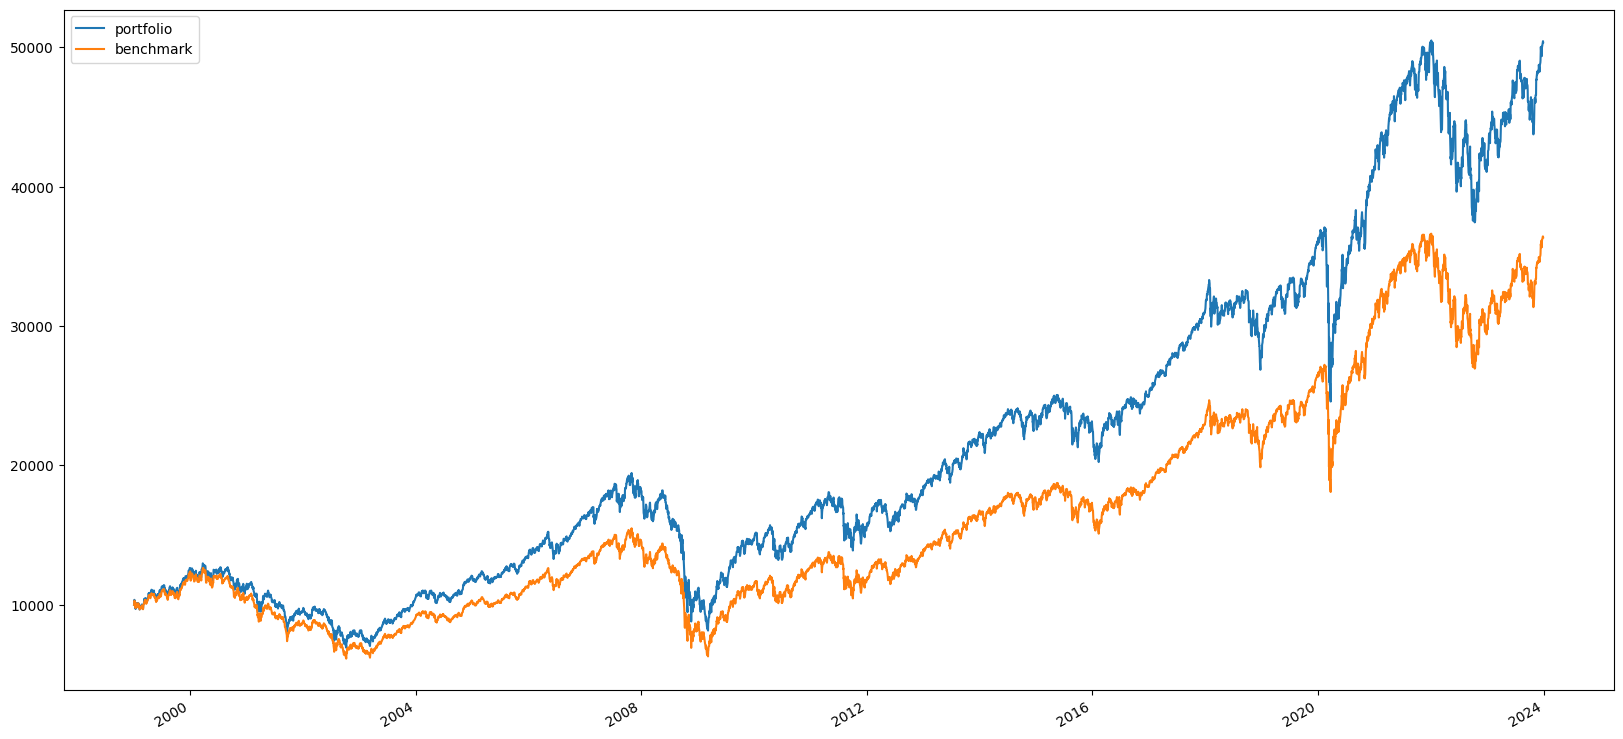

In [46]:
total_value_portfolio.plot(figsize=(20, 10))
benchmark_value.plot()
plt.legend(['portfolio', 'benchmark'])

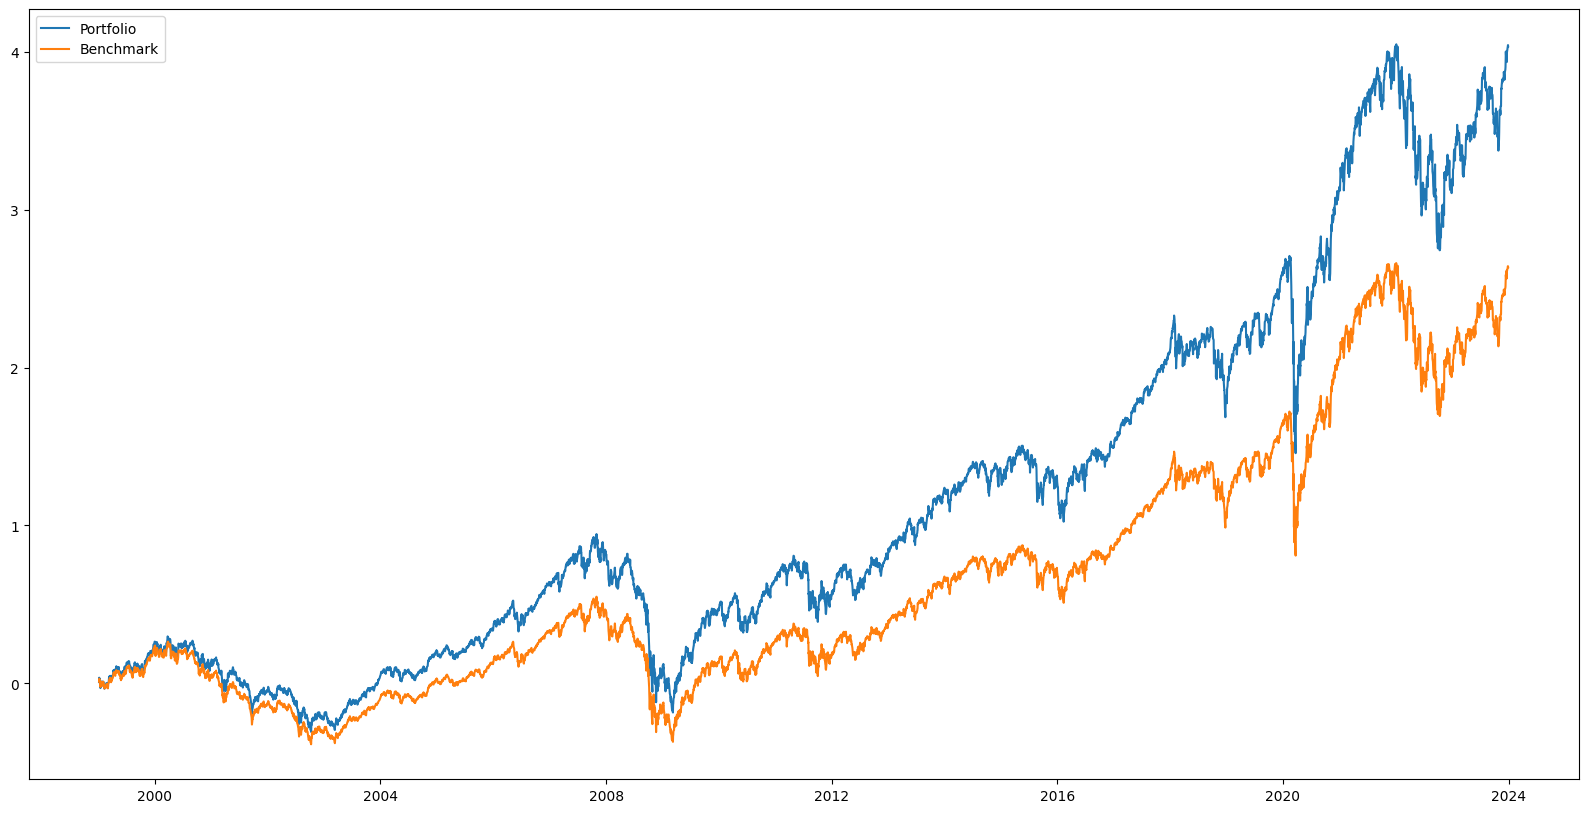

In [51]:
plt.figure(figsize=(20,10))
plt.plot((1 + total_value_portfolio.pct_change()).cumprod() - 1, label='Portfolio')
plt.plot((1 + benchmark.pct_change()).cumprod() - 1, label='Benchmark')
plt.legend()

plt.show()